In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import ( 
  BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
)

import xgboost as xgb
import lightgbm as lgb
# import catboost as cb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline, make_pipeline
import myLib as my

import graphviz

array([[ 0.        ,  0.69855363, -0.37828961],
       [ 1.        , -0.59496605,  0.68087477],
       [ 1.        , -0.39260616,  0.81429484],
       [ 1.        , -0.31596839, -0.77378268],
       [ 1.        , -0.06226184,  0.85892749]])

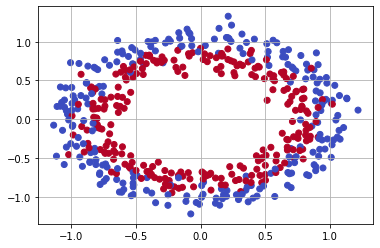

In [2]:
x, y = datasets.make_circles(n_samples=500, noise=0.1, random_state=123)

display( np.c_[y, x][:5] )

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

In [4]:
subSample = []
for _ in range(11):
  idx = [x for x in range(x.shape[0])]
  sampling = np.random.choice(idx, x.shape[0] // 2, replace=False)
  subSample.append(sampling)

In [13]:
print(len(subSample[0]))
print(len(subSample))

250
11


In [14]:
bagging = []
for idx in subSample:
  x_train = x[idx]
  y_train = y[idx]
  model = DecisionTreeClassifier().fit(x_train, y_train)
  bagging.append( model.predict(x) )

In [15]:
display( len(bagging) )
display( len(bagging[0]) )

11

500

In [16]:
from collections import Counter
bagging_predict = []
for i in range( len( bagging[0]) ):
  total = []
  for bag in bagging:
    total.append(bag[i])
  # print(total)
  # cnt = Counter(total)
  # print(cnt.most_common(1)[0][0])
  cnt = Counter(total)
  bagging_predict.append(cnt.most_common(1)[0][0])

In [20]:
total

[1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]